# 0. Import statements

In [ ]:
import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Enable autocomplete (using tab).

In [ ]:
%config Completer.use_jedi = False

# 1. Load data

In order to understand what happens in a computer vision model, we first have to understand how computers handle images. We'll use one of the most famous datasets in computer vision, MNIST, for our experiments. MNIST contains images of handwritten digits, collected by the National Institute of Standards and Technology and collated into a machine learning dataset by Yann Lecun and his colleagues. Lecun used MNIST in 1998 in Lenet-5, the first computer system to demonstrate practically useful recognition of handwritten digit sequences. This was one of the most important breakthroughs in the history of AI.

The MNIST database of handwritten digit has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# 2. Inspect data

Try to get a feel for the data you are using to train and test your neural network.

## Training data

- Training data will be used to train our neural network to recognize hand-written digits.
- MNIST provides 60000 labeled training images, each 28x28 pixels

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

### Exercise 1
**TODO**: Implement the show_image function and randomly select n different samples from the training set to display.

In [ ]:
def show_image(images, labels, index):
    # insert your code here

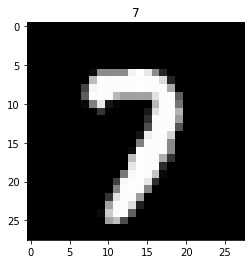

In [ ]:
# show a few random samples

## Test data

- Test data will be used to validate how good our network performs on data it has never seen.
- MNIST provides 10000 test images, each 28x28.
- It's important to note that these should never be used in the training cycle. A 'test set' should never contain images the network has already seen during training. (read more: [Model Selection and Train/Validation/Test Sets](https://www.coursera.org/lecture/machine-learning/model-selection-and-train-validation-test-sets-QGKbr) and [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/))

### Exercise 2

**TODO**: Print the test images and test labels shape below:

In [ ]:
test_images.

(10000, 28, 28)

In [ ]:
test_labels.

(10000,)

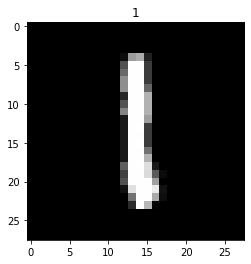

In [ ]:
show_image(test_images, test_labels, 168)

# 3. Data Preparation

Before feeding the data into the network for training, we make sure it is formatted properly.

## Prepare the images

### Exercise 3
**TODO**: Reshape the images to vectors of integers of size (60000, 784)

In [ ]:
train_images_reshaped = #
test_images_reshaped = #

In [ ]:
train_images_reshaped.shape

(60000, 784)

**Note**

An important preprocessing step for neural networks is normalisation or standardisation of the data. If you don't do this, the internal values in the network will go off the charts, because of the mathematical operations within the neural network.

### Exercise 4
**TODO**: Resize the values to a value between 0 and 1

In [ ]:
train_images_transformed = #
test_images_transformed = #

## Prepare the labels (one hot encoding)

One-hot encoding is a method of representing categorical variables as binary vectors. It's essential for machine learning models because they typically require numerical input. For example, if we have a categorical feature like "color" with three categories: red, blue, and green, one-hot encoding would convert this into three features: "is_red," "is_blue," and "is_green." If a sample is red, it would be represented as [1, 0, 0], blue as [0, 1, 0], and green as [0, 0, 1]. This encoding removes any ordinal relationship that might be mistakenly inferred by a model if the categories were just labeled with a single number (like 1, 2, 3).


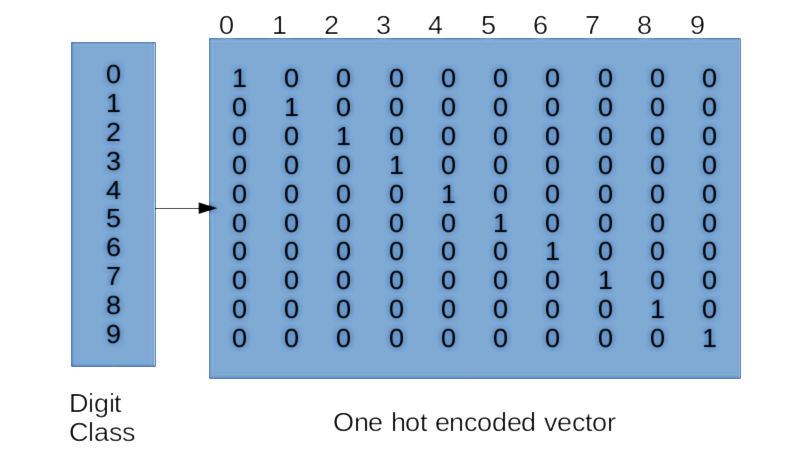

In [ ]:
train_labels[2]

4

In [ ]:
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [ ]:
train_labels_categorical[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# 4.0 Simple network architecture

Define a network with:

- input layer
- one hidden layer with 10 neurons
- output layer

In [ ]:
# insert your code here

Compile this network with the following parameters:
- optimizer: `keras.optimizers.SGD(learning_rate=1)`


Think about which loss function and metric you should use...

In [ ]:
# insert your code here

Train (`fit`) the network

Feed the training images and labels to the network.

Two additional parameters need to be supplied:

- epochs: how many times the network will look at the entire dataset. i.e. 10
- batch_size: how many images will be put through the network at one time. i.e. 32

In [ ]:
# insert your code here

*Note*

This is an _INTENTIONALLY_ bad result... Let's make a decent network with a good performance/output.


# 4.1 Decent network architecture





Define the network architecture that will be used for training

Look at the following [website](https://adamharley.com/nn_vis/mlp/2d.html). It has a superb visulaisation of what we are trying to achieve. Inspect the network in the website and search for the following info:

- how many layers
- how many nodes in each layer

Recreate the network here. Use `relu` as the activation function in the dense layers. (The website uses `tanh`, but `relu` should give better results.)

In [ ]:
# insert your code here

### (optional) Exercise 5

Start trying out different hyperparameters
  
  a. Change the 'relu' activation function to 'sigmoid'. What happens? (run the cells below to see a difference in test results)

  b. What happens if you add hidden layers?

  c. What happens when you try different initializers
  
  b. Figure out how to add "Dropout" to the first layer of the network.

  d. What happens if you add L1 or L2 regularization to the activations?

=> Start with one regularization or optimization parameter at a time.

=> Experiment with extreme values

=> Every time you try something new, inspect the training cycle of the model and the accompanying graphs

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# The final layer has 10 nodes, each node represents one class of numbers
network.add(layers.Dense(10, activation='softmax'))

### (optional) Exercise 5b
Try adding a BatchNorm layer. There is some discussion in the Deep Learning community about when to apply Batch Normalization. Either in between the linear part and the nonlinear part of your neuron, or after the nonlinear part.

Although there is no correct answer, the authors of Batch Normalization say that It should be applied immediately before the non-linearity of the current layer. The reason (quoted from original paper):

> "We add the BN transform immediately before the nonlinearity, by normalizing x = Wu+b. We could have also normalized the layer inputs u, but since u is likely the output of another nonlinearity, the shape of its distribution is likely to change during training, and constraining its first and second moments would not eliminate the covariate shift. In contrast, Wu + b is more likely to have a symmetric, non-sparse distribution, that is “more Gaussian” (Hyv¨arinen & Oja, 2000); normalizing it is likely to produce activations with a stable distribution."

You can add it after the activation in the following way:

`model.add(Dense(64, init='uniform', activation='relu')`

`model.add(BatchNormalization())`

You can add it in between the linear and nonlinear part in the following way:

`model.add(Dense(64, init='uniform'))`

`model.add(BatchNormalization())`

`model.add(Activation('tanh'))`



# 5. Compilation Step

In the compilation step we define the:

- the loss function: `categorical_crossentropy`
- the optimizer: `adam`
- the evaluation metric: `accuracy`

### (optional) Exercise 6

Experiment with different optimizers (SGD, Momentum, RMSProp, Adam, Nadam, etc).

Do they improve the accuracy of the test set?

Change the optimizer from "RMSProp" to "Adam" with good default values:

- learning rate of 0.01
- beta_1 of 0.9
- beta_2 of 0.999
- no epsilon
- learning rate decay (annealing)


What happens if you change the optimizer to good old SGD? Or to Nadam?

In [ ]:
network.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# 6. Network summary

In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# 7. Train the network

Feed the training images and labels to the network.

Two additional parameters need to be supplied:

- epochs: how many times the network will look at the entire dataset.
- batch_size: how many images will be put through the network at one time.

### Exercise 7

- Can you train the network longer?
- What happens when you adjust the batch size?
- What happens to the training accuracy?
- And the test accuracy?
- Try adding an early stopping callback function and check the effect it has on your model

In [ ]:
from keras.regularizers import *
from keras.callbacks import EarlyStopping

In [ ]:
history = network.fit(train_images_transformed, train_labels_categorical,
                      validation_split=0.33, epochs=10, batch_size=128)


Train on 40199 samples, validate on 19801 samples
Epoch 1/50
40199/40199 [==============================] - 1s 28us/step - loss: 1.2719 - accuracy: 0.7248 - val_loss: 0.7578 - val_accuracy: 0.8408
Epoch 2/50
40199/40199 [==============================] - 1s 27us/step - loss: 0.6309 - accuracy: 0.8576 - val_loss: 0.5243 - val_accuracy: 0.8736
Epoch 3/50
40199/40199 [==============================] - 1s 29us/step - loss: 0.4899 - accuracy: 0.8788 - val_loss: 0.4442 - val_accuracy: 0.8860
Epoch 4/50
40199/40199 [==============================] - 1s 27us/step - loss: 0.4276 - accuracy: 0.8888 - val_loss: 0.3989 - val_accuracy: 0.8966
Epoch 5/50
40199/40199 [==============================] - 1s 29us/step - loss: 0.3909 - accuracy: 0.8957 - val_loss: 0.3732 - val_accuracy: 0.9002
Epoch 6/50
40199/40199 [==============================] - 1s 31us/step - loss: 0.3657 - accuracy: 0.9007 - val_loss: 0.3530 - val_accuracy: 0.9046
Epoch 7/50
40199/40199 [==============================] - 1s 27us/s

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


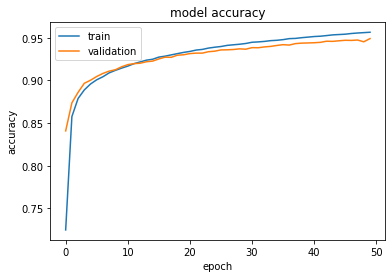

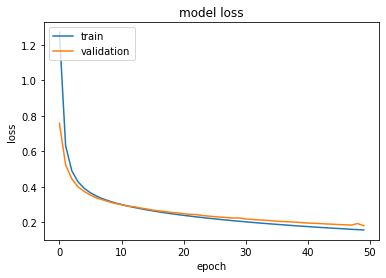

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 8. Test the network

Use the test set (which the network has not seen yet) to test how well the network will perform on images it has not seen yet:

In [ ]:
test_loss, test_acc = network.evaluate(test_images_transformed, test_labels_categorical)

10000/10000 [==============================] - 0s 17us/step


In [ ]:
print('test_acc; ', test_acc)

test_acc;  0.9519000053405762
